# Protocol Benchmarks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import *
from glob import glob as list_files
from pathlib import Path
import re

Formatting Stuff

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
mptcolors = prop_cycle.by_key()['color']
mptcolors[0]
colors = {'PRDT read': mptcolors[0], 'PRDT mixed': mptcolors[1], 'PRDT write': mptcolors[2], 'etcd read': mptcolors[3], 'etcd mixed': mptcolors[4], 'etcd write': mptcolors[5]}

from itertools import cycle
# solid, dotted, dashed, long dash with offsets, dashdotted, dashdotdotted
lines = ['solid',"dotted", "dashed"]
linecycler = cycle(lines)
linestyle = {'PRDT read': next(linecycler), 'PRDT mixed': next(linecycler), 'PRDT write': next(linecycler), 'etcd read':next(linecycler), 'etcd mixed': next(linecycler), 'etcd write': next(linecycler)}
#mylabels = {'etcd client1 cluster3 mixed 20_120': 'ARDT read', 'ARDT mixed': 'ARDT mixed', 'ARDT put': 'ARDT write', 'etcd get': 'etcd read', 'etcd mixed': 'etcd mixed', 'etcd put': 'etcd write'}

In [3]:
def load_results(path):
    files = list_files(path)
    dfs = []
    for file in files:
        runId = Path(file).name
        system = Path(file).parent.parent.name
        df = pd.read_csv(file, delimiter=";", dtype={'latency': 'float64', 'send-time': 'float64', 'receive-time': 'float64'})

        params = runId.split('-')

        df["run_config"] = f"{params[0]} {params[1]} {params[2]} {params[3]}"
        try:
            df["num-clients"] = re.match("client(_?)([0-9])", params[0])[2]
        except:
            df["num-clients"] = "undefined"
        try:
            df["num-nodes"] = re.match("cluster(_?)([0-9])", params[1])[2]
        except:
            df["num-nodes"] = "undefined"
        df["mode"] = params[2]
        df["run_id"] = re.match("(.*)\\.csv", params[4])[1]
        df["run"] = runId
        df["system"] = system
        df["index"] = pd.Series(range(0, len(df)))
        df['receive-time'] = df['receive-time'] - df['send-time'].min()
        df['send-time'] = df['send-time'] - df['send-time'].min()

        df['send-time-stamp'] = df['send-time'].apply(lambda x: pd.to_datetime(x, unit='us'))
        df['receive-time-stamp'] = df['receive-time'].apply(lambda x: pd.to_datetime(x, unit='us'))

        dfs.append(df)

    df = pd.concat(dfs)
    df["latency"] = (df["latency"] / 1000)
    df['send-time'] = df['send-time'] / 1000
    df['receive-time'] = df['receive-time'] / 1000
    df["unit"] = "ms" # fix unit

    return df

In [4]:
df = load_results("../benchmark-results/*/*/*.csv")
df

,name,op,args,send-time,receive-time,latency,unit,run_config,num-clients,num-nodes,mode,run_id,run,system,index,send-time-stamp,receive-time-stamp
0,client1,put,key15126 value15126,0.000,0.325,0.325121,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,0,1970-01-01 00:00:00.000000,1970-01-01 00:00:00.000325
1,client1,put,key19186 value19186,0.989,1.305,0.315352,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,1,1970-01-01 00:00:00.000989,1970-01-01 00:00:00.001305
2,client1,put,key13016 value13016,1.324,1.555,0.231074,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,2,1970-01-01 00:00:00.001324,1970-01-01 00:00:00.001555
3,client1,put,key19837 value19837,1.567,1.782,0.215726,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,3,1970-01-01 00:00:00.001567,1970-01-01 00:00:00.001782
4,client1,put,key16053 value16053,1.787,2.016,0.229241,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,4,1970-01-01 00:00:00.001787,1970-01-01 00:00:00.002016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122056,client1,put,key10156 value10156,30249.894,30250.061,0.167205,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,pb,122056,1970-01-01 00:00:30.249894,1970-01-01 00:00:30.250061
122057,client1,put,key16174 value16174,30250.061,30250.232,0.170260,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,pb,122057,1970-01-01 00:00:30.250061,1970-01-01 00:00:30.250232
122058,client1,put,key14091 value14091,30250.232,30250.391,0.159129,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,pb,122058,1970-01-01 00:00:30.250232,1970-01-01 00:00:30.250391
122059,client1,put,key15507 value15507,30250.391,30250.562,0.171061,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,pb,122059,1970-01-01 00:00:30.250391,1970-01-01 00:00:30.250562


In [5]:
# fix dataframe
df.loc[df['name'] == 'client_1', 'name'] = 'client1'
df.loc[df['run_config'] == 'client_1 cluster3 write 20_120', 'run_config'] = 'write'
df.loc[df['run_config'] == 'client_1 cluster3 mixed 20_120', 'run_config'] = 'mixed'
df.loc[df['run_config'] == 'client_1 cluster3 read 20_120', 'run_config'] = 'read'
df.loc[df['run_config'] == 'client1 cluster3 write 20_120', 'run_config'] = 'write'
df.loc[df['run_config'] == 'client1 cluster3 mixed 20_120', 'run_config'] = 'mixed'
df.loc[df['run_config'] == 'client1 cluster3 read 20_120', 'run_config'] = 'read'
df.loc[df['run_config'] == 'client_1 cluster3 write 0_240', 'run_config'] = 'write'
df.loc[df['run_config'] == 'client_1 cluster3 mixed 0_240', 'run_config'] = 'mixed'
df.loc[df['run_config'] == 'client_1 cluster3 read 0_240', 'run_config'] = 'read'
df.loc[df['run_config'] == 'client1 cluster3 write 0_240', 'run_config'] = 'write'
df.loc[df['run_config'] == 'client1 cluster3 mixed 0_240', 'run_config'] = 'mixed'
df.loc[df['run_config'] == 'client1 cluster3 read 0_240', 'run_config'] = 'read'

df.loc[df['system'] == 'pb', 'system'] = 'PRDT'
df

,name,op,args,send-time,receive-time,latency,unit,run_config,num-clients,num-nodes,mode,run_id,run,system,index,send-time-stamp,receive-time-stamp
0,client1,put,key15126 value15126,0.000,0.325,0.325121,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,0,1970-01-01 00:00:00.000000,1970-01-01 00:00:00.000325
1,client1,put,key19186 value19186,0.989,1.305,0.315352,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,1,1970-01-01 00:00:00.000989,1970-01-01 00:00:00.001305
2,client1,put,key13016 value13016,1.324,1.555,0.231074,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,2,1970-01-01 00:00:00.001324,1970-01-01 00:00:00.001555
3,client1,put,key19837 value19837,1.567,1.782,0.215726,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,3,1970-01-01 00:00:00.001567,1970-01-01 00:00:00.001782
4,client1,put,key16053 value16053,1.787,2.016,0.229241,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,etcd,4,1970-01-01 00:00:00.001787,1970-01-01 00:00:00.002016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122056,client1,put,key10156 value10156,30249.894,30250.061,0.167205,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,PRDT,122056,1970-01-01 00:00:30.249894,1970-01-01 00:00:30.250061
122057,client1,put,key16174 value16174,30250.061,30250.232,0.170260,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,PRDT,122057,1970-01-01 00:00:30.250061,1970-01-01 00:00:30.250232
122058,client1,put,key14091 value14091,30250.232,30250.391,0.159129,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,PRDT,122058,1970-01-01 00:00:30.250232,1970-01-01 00:00:30.250391
122059,client1,put,key15507 value15507,30250.391,30250.562,0.171061,ms,client1 cluster3 timed 10_30,1,3,timed,run1,client1-cluster3-timed-10_30-run1.csv,PRDT,122059,1970-01-01 00:00:30.250391,1970-01-01 00:00:30.250562


## Latency Plotting

In [6]:
latency_df = df[['system', 'mode', 'latency', 'index', 'name']] \
    .groupby(['system', 'mode', 'index', 'name']) \
    .mean().reset_index().set_index('index')

In [7]:
#latency_df['latency'] = latency_df['latency'] / 130
latency_df

,system,mode,name,latency
index,,,,
0,PRDT,timed,client1,1.552708
1,PRDT,timed,client1,0.204544
2,PRDT,timed,client1,0.166232
3,PRDT,timed,client1,0.152727
4,PRDT,timed,client1,0.157546
...,...,...,...,...
134062,etcd,timed,client1,0.189165
134063,etcd,timed,client1,0.187483
134064,etcd,timed,client1,0.186571


PRDT
timed
etcd
timed


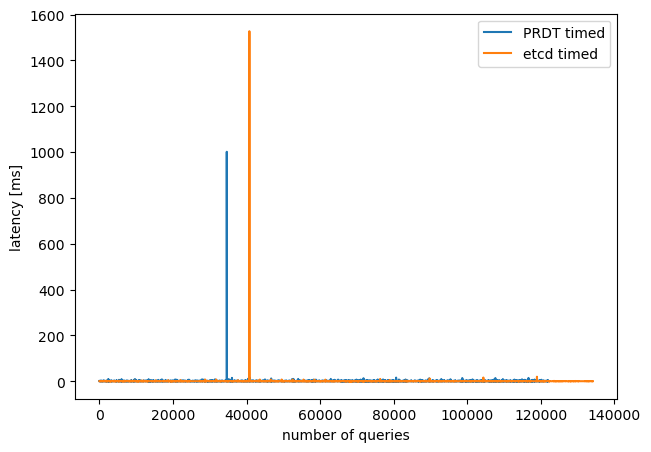

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

def plot_latency(ax, label: str, df: pd.DataFrame, group_size):
    grouped_df = df.groupby({x: (x // group_size) * group_size for x in range(len(df))})
    mean_latency = grouped_df.mean()
    mean_latency.plot(y='latency', ax=ax, label=label,  linestyle=linestyle.get(label))



for system in latency_df['system'].unique():
    print(system)
    system_df = latency_df[latency_df['system'] == system]

    for mode in latency_df['mode'].unique():
        print(mode)
        run_df = system_df[system_df['mode'] == mode]
        plot_latency(ax, f"{system} {mode}", run_df[['latency']], 1)

ax.set_xlabel("number of queries")
ax.set_ylabel("latency [ms]")

# ax.set_ylim([0, 136])

#order = [3,4,5,2,1,0]
#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.legend()

plt.savefig(fname="latency.png", format="png")
plt.savefig(fname="latency.pdf", format="pdf")

In [13]:
for system in latency_df["system"].unique():
    system_df = latency_df[latency_df.system == system]
    for mode in system_df["mode"].unique():
            filtered_df = sys_df[(sys_df["mode"] == mode)]
            mean_latency = filtered_df["latency"].quantile(0.5)
            print(f"mean latency for {system} {mode}: {mean_latency}")

NameError: name 'sys_df' is not defined

## Throughput Plotting

In [14]:
df["seconds"] = (df["receive-time"] / 1000).apply(round)

Mean Throughput for etcd client1 cluster3 timed 10_30: 479.0
Mean Throughput for PRDT client1 cluster3 timed 10_30: 409.0


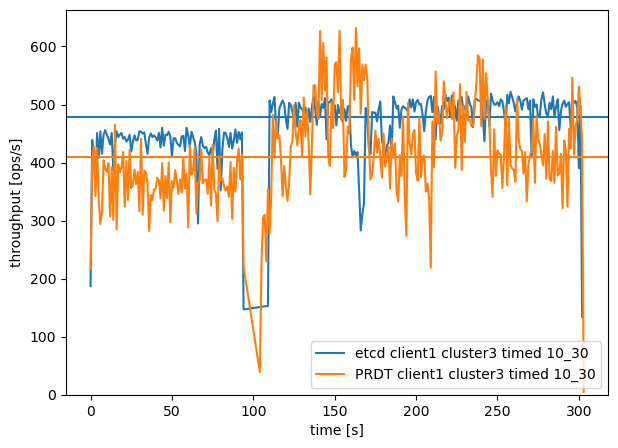

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_data = []

for system in df['system'].unique():
    sys_df = df[df['system'] == system]

    for run_config in sys_df["run_config"].unique():
        filtered_df = sys_df[(sys_df["run_config"] == run_config)]

        throughput = filtered_df.groupby("seconds")["name"].count() / len(sys_df[sys_df['run_config'] == run_config]['run_id'].unique())
        throughput.plot(ax=ax, label=f"{system} {run_config}")
        mean_throughput = throughput.quantile(0.5)
        res_data.append([system, run_config, mean_throughput])
        print(f"Mean Throughput for {system} {run_config}: {mean_throughput}")

        # also_mean_throughput = filtered_df["name"].count() / filtered_df["seconds"].max()
        # print(f"Diff {mean_throughput - also_mean_throughput}")

        ax.axhline(y=mean_throughput, color=ax.get_lines()[-1].get_color())
        # ax.axhline(y=also_mean_throughput, color=ax.get_lines()[-1].get_color())

ax.legend()
ax.set_ylim(ymin=0)

ax.set_xlabel('time [s]')
ax.set_ylabel('throughput [ops/s]')

plt.savefig(fname="throughput.pdf", format="pdf")
plt.savefig(fname="throughput.png", format="png")

Mean Throughput for etcd client1 cluster3 timed 10_30: 4710.0
Mean Throughput for PRDT client1 cluster3 timed 10_30: 4010.0


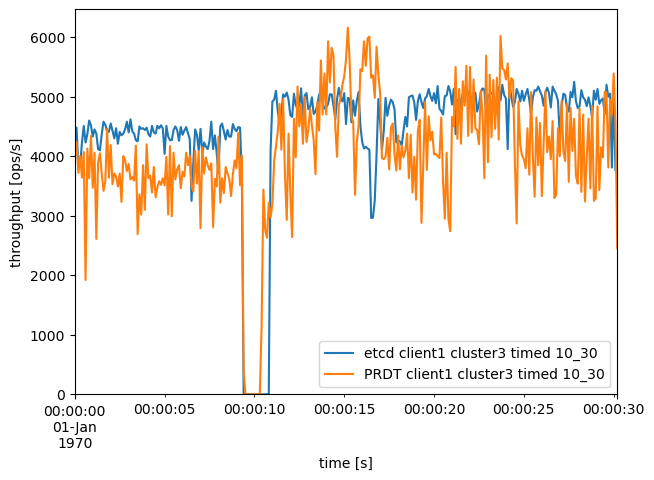

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_data = []

bin_size = 100 # bin size in ms

for system in df['system'].unique():
    sys_df = df[df['system'] == system]

    for run_config in sys_df["run_config"].unique():
        filtered_df = sys_df[(sys_df["run_config"] == run_config)]

        throughput = filtered_df.set_index('send-time-stamp')["name"].resample(f'{bin_size}ms').count() * (1000 / bin_size)

        throughput.plot(ax=ax, label=f"{system} {run_config}")
        mean_throughput = throughput.quantile(0.5)
        res_data.append([system, run_config, mean_throughput])
        print(f"Mean Throughput for {system} {run_config}: {mean_throughput}")

        # also_mean_throughput = filtered_df["name"].count() / filtered_df["seconds"].max()
        # print(f"Diff {mean_throughput - also_mean_throughput}")

        # ax.axhline(y=mean_throughput, color=ax.get_lines()[-1].get_color())
        # ax.axhline(y=also_mean_throughput, color=ax.get_lines()[-1].get_color())

ax.legend()
ax.set_ylim(ymin=0)

ax.set_xlabel('time [s]')
ax.set_ylabel('throughput [ops/s]')

plt.savefig(fname="throughput-2.pdf", format="pdf")
plt.savefig(fname="throughput-2.png", format="png")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_df = pd.DataFrame(data=res_data, columns=['system', 'type', 'throughput'])

etcd_df = res_df[res_df.system == 'etcd'][['type', 'throughput']]
pb_df = res_df[res_df.system == 'PRDT'][['type', 'throughput']]

pd.DataFrame(data={'type': etcd_df.type, 'etcd': list(etcd_df.throughput), 'prdt': list(pb_df.throughput)}).set_index('type').plot.bar(ax=ax)

ax.set_ylabel('throughput [ops/s]')
ax.set_xlabel('')

# fig.savefig(fname="throughput_comp.pdf", format="pdf")

In [ ]:
df.groupby(['system', 'run_config', 'run_id'])['send-time'].max() / 1000